In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Jamshedpur.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Ghousia Hotel,300,"Biryani,North Indian,Chinese,Rolls",Jamshedpur,Sakchi,Quick Bites,11am to 11pm(Mon-Sun),Excellent,4.5,444
1,The Chocolate Room,600,"Desserts,Beverages,Pizza,Burger,Sandwich,Stree...",Jamshedpur,Bistupur,Café,11am to 11pm(Mon-Sun),Excellent,4.5,224
2,Junction Restraurant,600,"Biryani,Chinese",Jamshedpur,Sakchi,Casual Dining,11am to 11pm(Mon-Sun),Very Good,4.2,182
3,Novelty Multicuisine Restaurant,700,"South Indian,Chinese,North Indian",Jamshedpur,Bistupur,Casual Dining,1030am to 1030pm(Mon-Sun),Very Good,4.3,161
4,Junction,300,"Biryani,Chinese,Rolls",Jamshedpur,Bistupur,Quick Bites,11am to 11pm(Mon-Sun),Good,3.9,131


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
Name                194 non-null object
Price               194 non-null int64
Cuisine_Category    194 non-null object
City                194 non-null object
Region              194 non-null object
Cuisine_Type        194 non-null object
Timing              194 non-null object
Rating_Types        194 non-null object
Rating              194 non-null float64
Votes               194 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 15.2+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,194.000000,194.000000,194.000000
mean,404.278351,3.541237,52.938144
std,264.791921,0.413315,60.886425
min,0.000000,2.400000,4.000000
25%,200.000000,3.200000,13.000000
50%,400.000000,3.500000,30.000000
75%,500.000000,3.800000,68.750000
max,2000.000000,4.800000,444.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Cakes & Bakes     4
Domino's Pizza    3
Saffron           2
Ramesh Kulfi      2
Delhi Darbar      2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Bistupur        80
Sakchi          51
Sonari          21
Mango           16
Gamharia        15
Golmuri          9
Telco Colony     2
Name: Region, dtype: int64

Text(0.5,1,'Region')

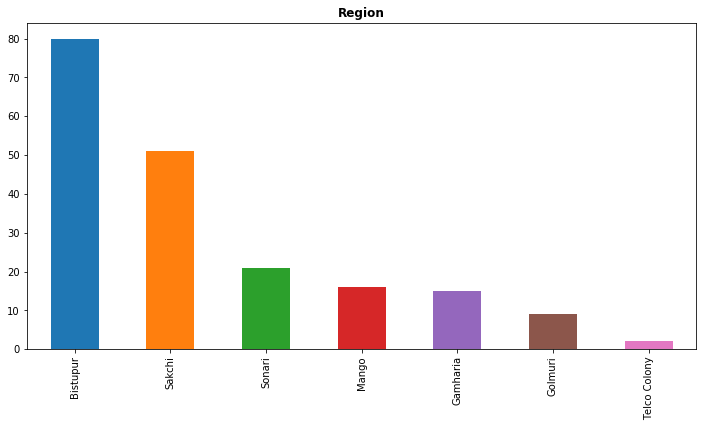

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

ValueError: 'explode' must be of length 'x'

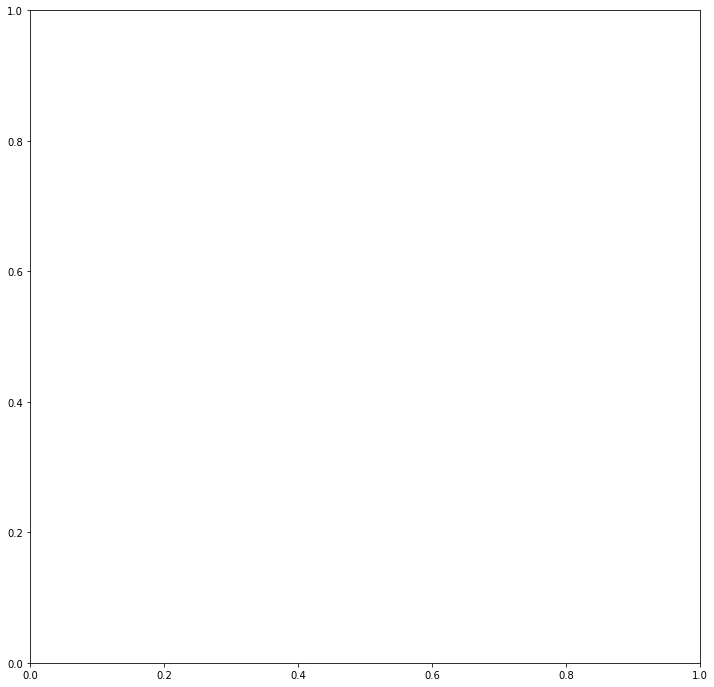

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      83
Good         79
Very Good    26
Excellent     5
Poor          1
Name: Rating_Types, dtype: int64

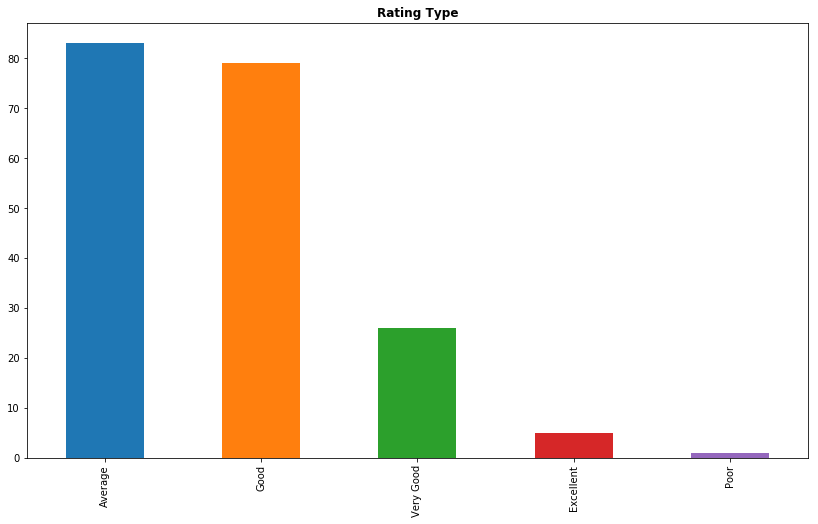

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Casual Dining     92
Quick Bites       53
Bakery            15
Café               7
Food Truck         6
Food Court         4
Bar                4
Dessert Parlor     3
Bhojanalya         3
Sweet Shop         2
Name: Cuisine_Type, dtype: int64

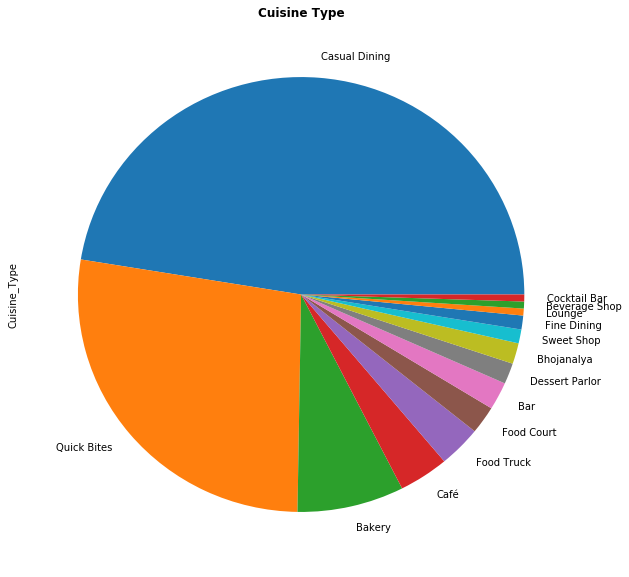

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.541237113402063


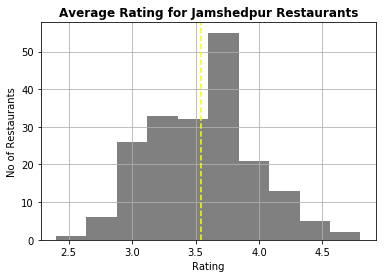

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Jamshedpur Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Jamshedpur is found to be around 3.5

# Top cuisines in Jamshedpur

In [22]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

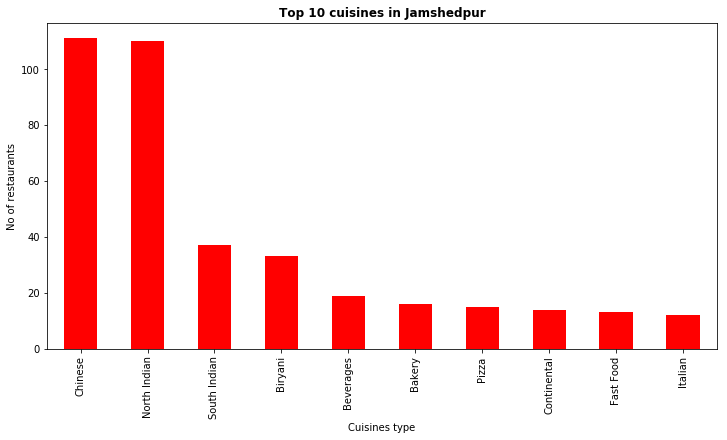

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Jamshedpur',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [24]:
data['Price'].value_counts()[:20]

500     34
300     30
200     26
400     26
100     15
600     14
150     11
800     10
1000     6
700      5
250      3
80       2
0        2
350      2
450      2
750      2
1600     1
50       1
2000     1
120      1
Name: Price, dtype: int64

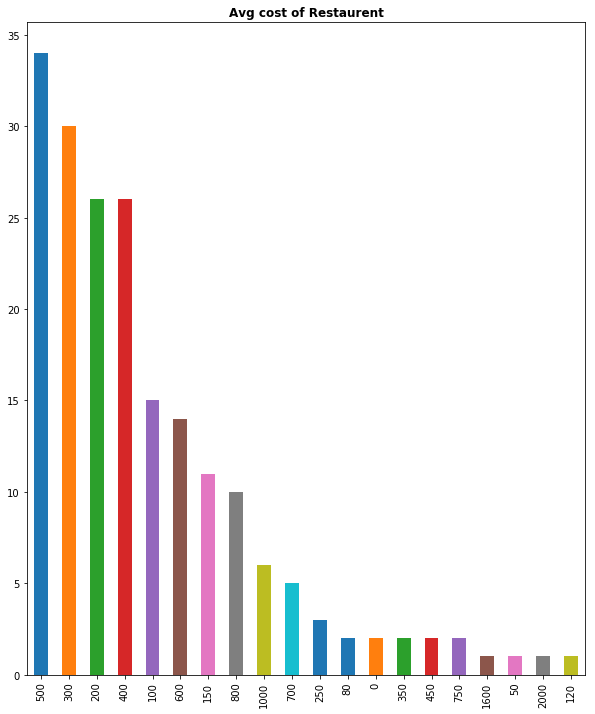

In [25]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [26]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

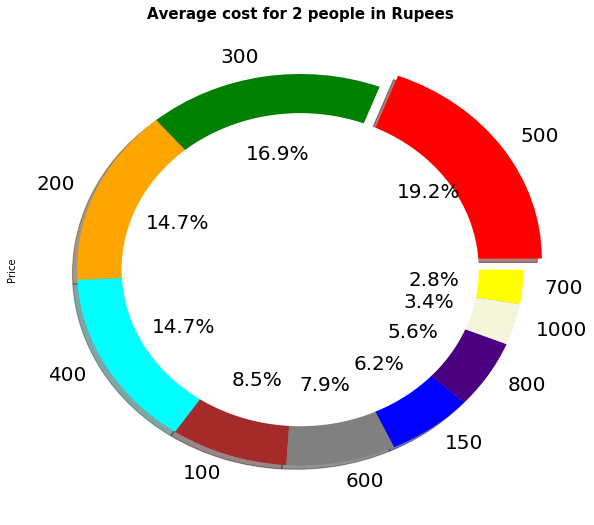

In [27]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 500